In [4]:
import os

dir_250 = r"C:\Users\gac8\PycharmProjects\PSSearch\data\retail_forecasting\250"
def in_250(path):
    return os.path.join(dir_250, path)


def read_fitness_file(file, column):
    if column == "all":
        return np.genfromtxt(file, delimiter=",", dtype=float)
    return np.genfromtxt(file, delimiter=",", dtype=float, usecols=column)

def read_vector(file):
    return np.loadtxt(file, delimiter=",", dtype=int)

In [21]:
import numpy as np

train_vectors = read_vector(in_250("train_many_hot_vectors_250_qmc.csv"))
train_fitness = read_fitness_file(in_250("train_fitness_250_qmc.csv"), column="all")

test_vectors = read_vector(in_250("test_many_hot_vectors_250_qmc.csv"))
test_fitness = read_fitness_file(in_250("test_fitness_250_qmc.csv"), column="all")

general_vectors = read_vector(in_250("many_hot_vectors_250_qmc.csv"))
general_fitness = read_fitness_file(in_250("fitness_250_qmc.csv"), column="all")



In [22]:
print(f"{train_vectors.shape = }")
print(f"{train_fitness.shape = }")

print(f"{test_vectors.shape = }")
print(f"{test_fitness.shape = }")

print(f"{general_vectors.shape = }")
print(f"{general_fitness.shape = }")

train_vectors.shape = (36794, 250)
train_fitness.shape = (36794, 7)
test_vectors.shape = (15832, 250)
test_fitness.shape = (15832, 7)
general_vectors.shape = (52626, 250)
general_fitness.shape = (52626, 7)


In [12]:
def verify_if_is_concat(a, b, a_plus_b):
    def sort_rows(x):
        # https://stackoverflow.com/questions/38277143/sort-2d-numpy-array-lexicographically
        return x[np.lexsort(np.rot90(x))]
    expected = np.vstack((a, b))
    expected = sort_rows(expected)
    return np.array_equal(sort_rows(a_plus_b), expected)


m = np.random.random((50, 30))
in_a = np.random.random(50) < 0.5

a = m[in_a]
b = m[~in_a]
c = m[np.random.random(50) < 0.5]

print(verify_if_is_concat(a, b, m))
print(verify_if_is_concat(a, c, m))
print(verify_if_is_concat(c, b, m))

True
False
False


In [23]:
print(verify_if_is_concat(train_vectors, test_vectors, general_vectors))
print(verify_if_is_concat(train_fitness, test_fitness, general_fitness))

True
True


In [18]:
print(test_vectors.shape)

(15832, 7)


0 (0.0007308574859052896, 1.0)


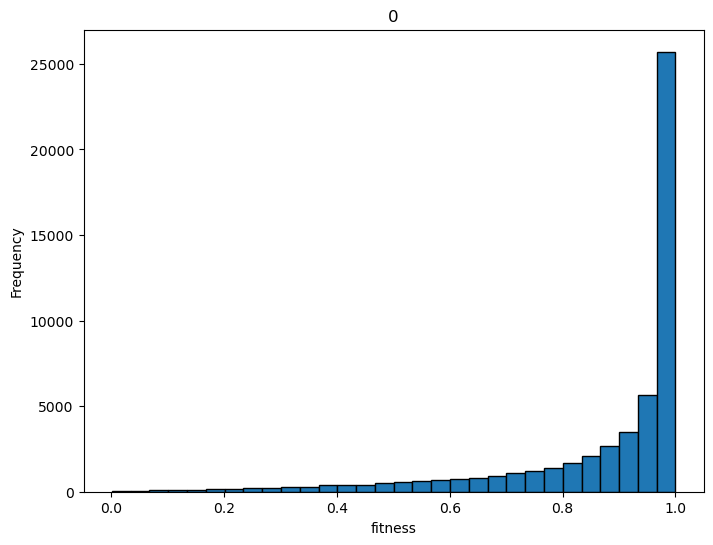

1 (1.1366194446802534e-19, 0.6111973524093628)


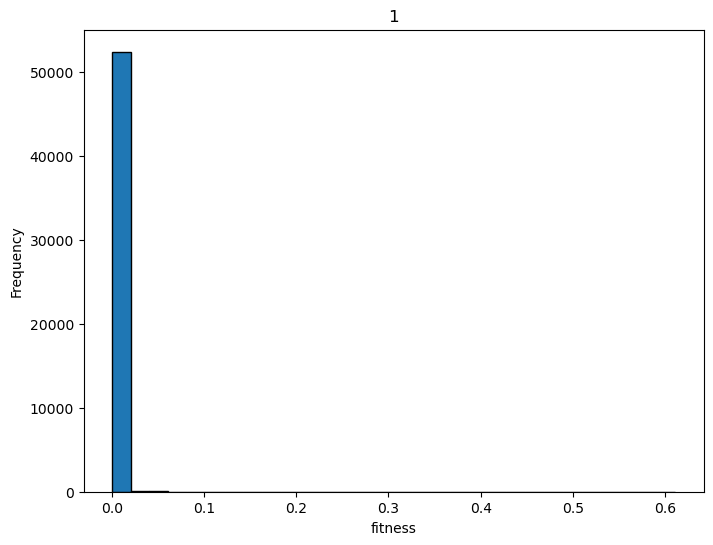

2 (-7.220561504364014, 26.43162727355957)


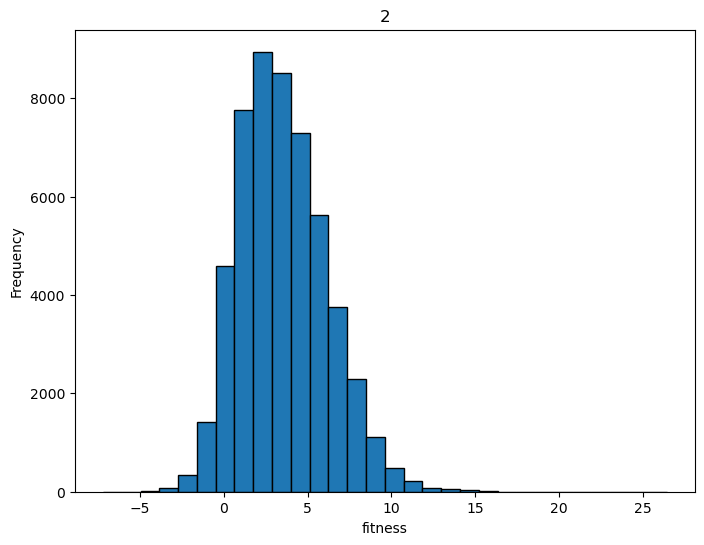

3 (-87918.71875, 22596.31640625)


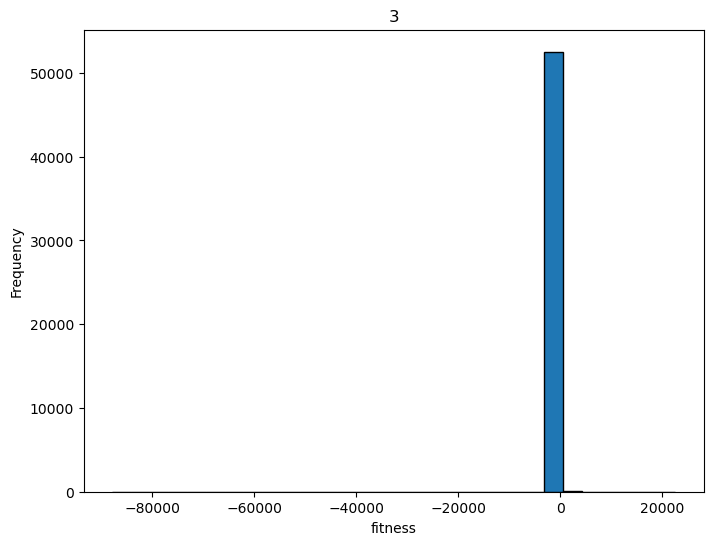

4 (0.0, 1.0)


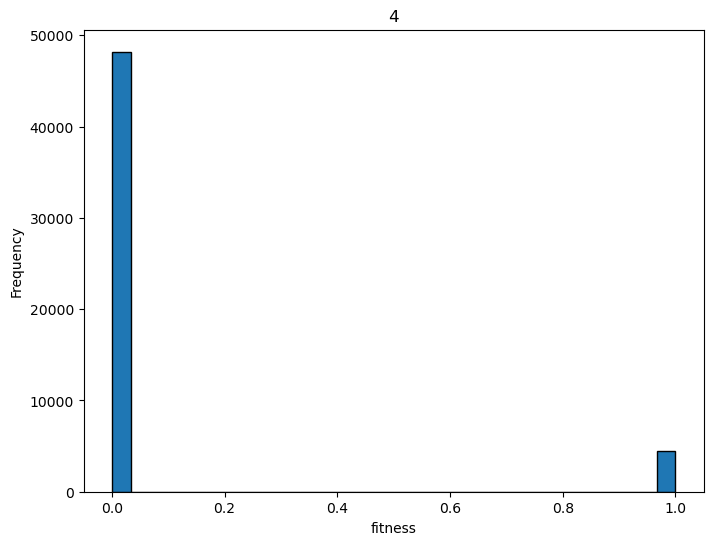

5 (0.0, 1.0)


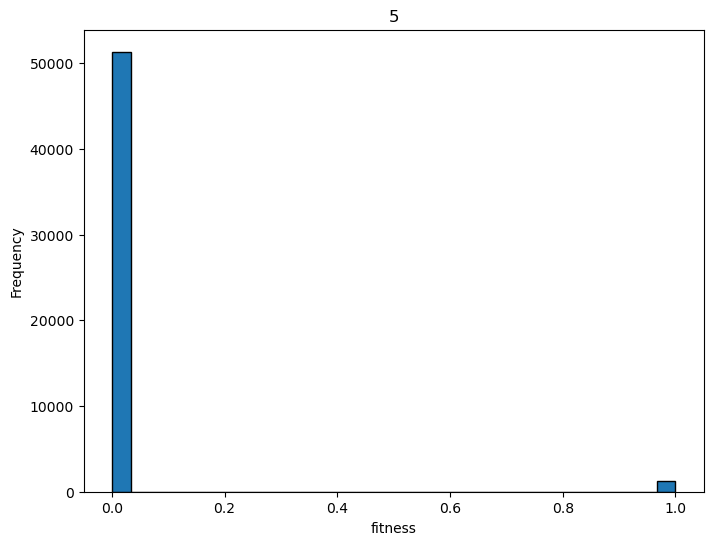

6 (-100.0, -0.0)


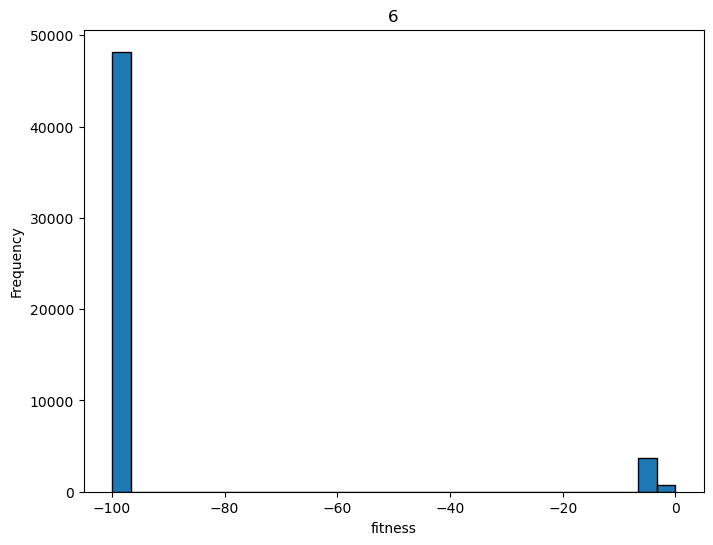

In [26]:
from matplotlib import pyplot as plt


def minmax(data):
    return np.min(data), np.max(data)

for col_index, data in enumerate(general_fitness.T):
    print(col_index, minmax(data))
    plt.figure(figsize=(8, 6))
    # Create histogram; assuming all values are numeric and continuous
    plt.hist(data, bins=30, edgecolor='black')
    # Set title with file name and column name
    plt.title(f"{col_index}")
    plt.xlabel("fitness")
    plt.ylabel("Frequency")
    
    # Save the histogram to a file in the output directory
    plt.show()
    